# Green Cart Ltd – Sales & Customer Analysis
### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")




In [2]:
# Load datasets
sales_df = pd.read_csv("/content/drive/MyDrive/Uptrail/Week2/Copy of sales_data.csv")
product_df = pd.read_csv("/content/drive/MyDrive/Uptrail/Week2/Copy of product_info.csv")
customer_df = pd.read_csv("/content/drive/MyDrive/Uptrail/Week2/Copy of customer_info.csv")

# Data Cleaning
### Sales Data Cleaning

In [3]:
sales_df.info()
product_df.info()
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     objec

### Sales Table

In [4]:
sales_df.nunique()

,0
order_id,2997
customer_id,499
product_id,30
quantity,7
unit_price,2140
order_date,147
delivery_status,7
payment_method,5
region,6
discount_applied,5


In [5]:
# Standardise text columns
text_cols = ["delivery_status", "payment_method", "region"]
for col in text_cols:
    sales_df[col] = sales_df[col].str.strip().str.title()




In [6]:
# Convert dates
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"], errors="coerce")


In [7]:

# Handle missing values
sales_df["discount_applied"] = sales_df["discount_applied"].fillna(0.0)


In [8]:

# Remove duplicates
sales_df = sales_df.drop_duplicates(subset="order_id")



In [9]:
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'],errors='coerce')
sales_df['unit_price'] = pd.to_numeric(sales_df['unit_price'],errors='coerce')
sales_df['discount_applied'] = pd.to_numeric(sales_df['discount_applied'],errors='coerce')

In [10]:
# Validate numeric columns
sales_df = sales_df[
    (sales_df["quantity"] >= 0) &
    (sales_df["unit_price"] >= 0) &
    (sales_df["discount_applied"] >= 0)
]

In [11]:
sales_df.nunique()

,0
order_id,2991
customer_id,499
product_id,30
quantity,5
unit_price,2138
order_date,60
delivery_status,5
payment_method,4
region,6
discount_applied,5


### Product Table

In [12]:
product_df.nunique()

,0
product_id,30
product_name,30
category,5
launch_date,29
base_price,30
supplier_code,30


In [13]:
# Standardise text columns
product_df["category"] = product_df["category"].str.strip().str.title()
product_df["product_name"] = product_df["product_name"].str.strip()
# Convert dates
product_df["launch_date"] = pd.to_datetime(product_df["launch_date"], errors="coerce")
# Handle missing values
product_df["category"] = product_df["category"].fillna("Unknown")
# Remove duplicates
product_df = product_df.drop_duplicates(subset="product_id")

/tmp/ipython-input-77519268.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df["launch_date"] = pd.to_datetime(product_df["launch_date"], errors="coerce")


In [14]:
product_df.nunique()

,0
product_id,30
product_name,30
category,5
launch_date,29
base_price,30
supplier_code,30


### Customer Table

In [15]:
customer_df.nunique()

,0
customer_id,497
email,494
signup_date,271
gender,6
region,5
loyalty_tier,7


In [16]:
# Standardise text columns
customer_df["region"] = customer_df["region"].str.strip().str.title()
customer_df["loyalty_tier"] = customer_df["loyalty_tier"].str.strip().str.title()
# Convert dates
customer_df["signup_date"] = pd.to_datetime(customer_df["signup_date"], errors="coerce")
# Handle missing values
customer_df["loyalty_tier"] = customer_df["loyalty_tier"].fillna("Bronze")
# Remove duplicates
customer_df = customer_df.drop_duplicates(subset="customer_id")

/tmp/ipython-input-861318993.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df["signup_date"] = pd.to_datetime(customer_df["signup_date"], errors="coerce")


In [17]:
customer_df.nunique()

,0
customer_id,497
email,492
signup_date,271
gender,6
region,5
loyalty_tier,6


# Merge the Data

In [18]:
# Merge sales_data with product_info using product_id
# Then merge the result with customer_info using customer_id
merged_df = sales_df.merge(product_df, on="product_id", how="left")
merged_df = merged_df.merge(customer_df, on="customer_id", how="left")

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2989 non-null   object        
 7   payment_method    2989 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null   object        
 12  launch_date       2987 non-null   datetime64[ns]
 13  base_price        2987 non-null   float64       
 14  supplier_code     2987 n

Left joins preserve all sales transactions, even if product or customer metadata is missing.

In [19]:
# Sale region= region_x
#Customer region=region_y
merged_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,male,Central,Gold


# Feature Engineering
### Create the following new columns:

In [20]:
# Revenue
# revenue = quantity × unit_price × (1 - discount_applied)
merged_df["revenue"] = ( merged_df["quantity"] * merged_df["unit_price"] *(1 - merged_df["discount_applied"]))

In [21]:
# ISO week
# order_week = ISO week from order_date
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week

In [22]:
# Price band
# price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)
merged_df["price_band"] = pd.cut(merged_df["unit_price"],bins=[0, 15, 30, np.inf],labels=["Low", "Medium", "High"])


In [23]:
# Days between product launch and order, days_to_order = Days between launch_date and order_date
merged_df["days_to_order"] = (merged_df["order_date"] - merged_df["launch_date"]).dt.days


In [24]:
# Email domain
# email_domain = Extract domain from email (e.g., gmail.com)
merged_df["email_domain"] = merged_df["email"].str.split("@").str[-1]

In [25]:
# Late delivery flag
# is_late = True if delivery_status is "Delayed"
merged_df["is_late"] = merged_df["delivery_status"] == "Delayed"

# Summary Tables

In [26]:
# Weekly revenue trends by region
# Sale region= region_x


weekly_revenue_by_region = merged_df.groupby(["order_week", "region_x"])["revenue"].sum().reset_index()
weekly_revenue_by_region.head(5)

,order_week,region_x,revenue
0,1,East,173.8310
1,1,North,20.7825
2,1,South,55.8790
3,1,West,325.3200
4,2,Central,2248.1720


In [27]:
# Product Category Performance
category_performance = (merged_df.groupby("category").agg(total_revenue=("revenue", "sum"),
                       total_quantity=("quantity", "sum"),avg_discount=("discount_applied", "mean"))
                      .sort_values("total_revenue", ascending=False))

In [28]:
# Customer Behaviour by Loyalty Tier & Signup Month
merged_df["signup_month"] = merged_df["signup_date"].dt.to_period("M")

customer_behaviour = (merged_df.groupby(["loyalty_tier", "signup_month"])
                     .agg(revenue=("revenue", "sum"),orders=("order_id", "nunique")))

In [29]:
# Delivery performance by region and price_band

delivery_performance = (merged_df.groupby(["region_x", "price_band"]).agg(total_revenue=("revenue", "sum"),
                             total_orders=("order_id", "nunique")))
""" delivery_performance = (
    merged_df
    .groupby(["region_x", "price_band"])["is_late"]
    .mean()
    .reset_index(name="late_delivery_rate")
)"""




/tmp/ipython-input-2677808846.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_performance = (merged_df.groupby(["region_x", "price_band"]).agg(total_revenue=("revenue", "sum"),


' delivery_performance = (\n    merged_df\n    .groupby(["region_x", "price_band"])["is_late"]\n    .mean()\n    .reset_index(name="late_delivery_rate")\n)'

In [30]:
# Preferred payment methods by loyalty_tier
payment_pref = (
    merged_df
    .groupby(["loyalty_tier", "payment_method"])
    .size()
    .reset_index(name="order_count")
    .sort_values(by=["loyalty_tier", "order_count"], ascending=[True, False]))





# Visual Exploration

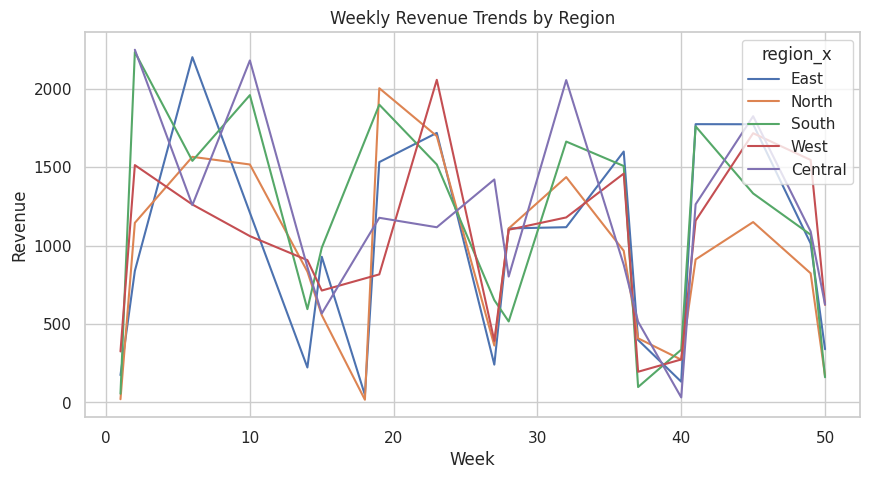

In [31]:
# Line plot - weekly revenue trends by region
plt.figure(figsize=(10,5))
sns.lineplot(
    data=weekly_revenue_by_region,
    x="order_week",
    y="revenue",
    hue="region_x"
)
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.title("Weekly Revenue Trends by Region")
plt.show()

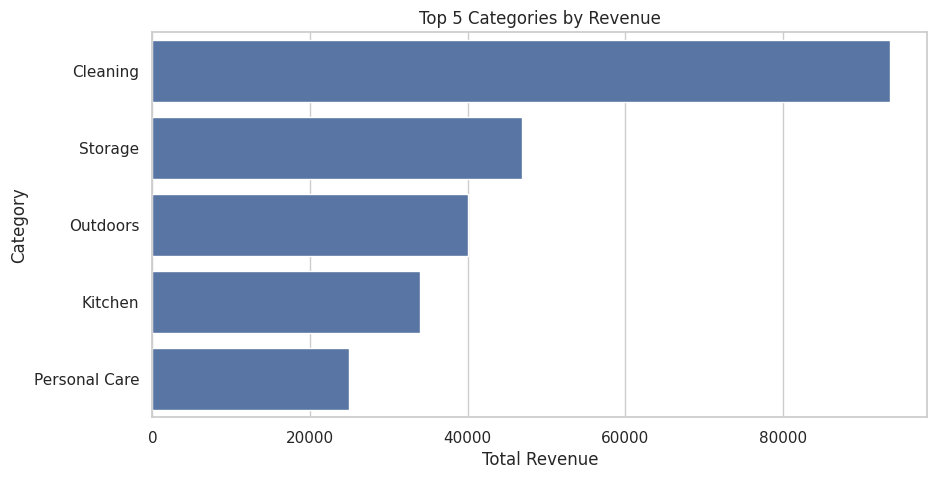

In [32]:
# Bar chart - top 5 categories by revenue
plt.figure(figsize=(10,5))
sns.barplot(
    data=category_performance.head(5),
    x="total_revenue",
    y=category_performance.head(5).index,
    orient="h"
)
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.title("Top 5 Categories by Revenue")
plt.show()



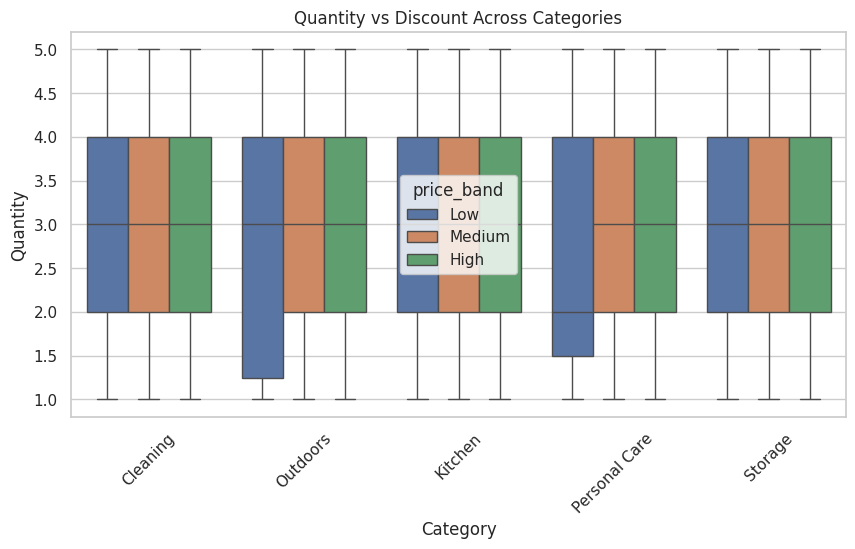

In [33]:
#Boxplot - quantity vs discount across categories
plt.figure(figsize=(10,5))
sns.boxplot(
    data=merged_df,
    x="category",
    y="quantity",
    hue="price_band"
)
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Quantity vs Discount Across Categories")
plt.xticks(rotation=45)
plt.show()

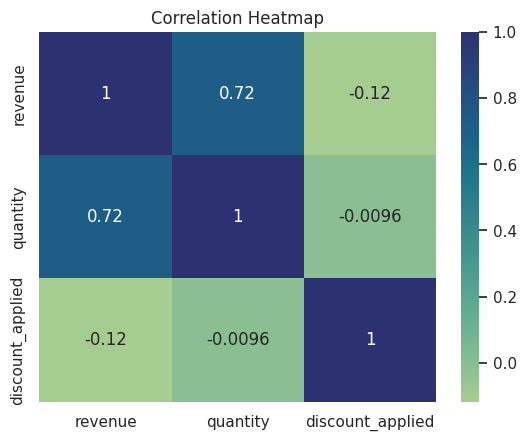

In [34]:
#Heatmap - correlation between revenue, discount, and quantity

sns.heatmap(
    merged_df[["revenue","quantity", "discount_applied"]].corr(),
    annot=True,
    cmap="crest"
)
plt.title("Correlation Heatmap")
plt.show()



In [35]:
# unique values of 'loyalty_tier'
merged_df["loyalty_tier"].unique()

array(['Silver', 'Gold', 'Bronze', nan, 'Sllver', 'Gld', 'Brnze'],
      dtype=object)

In [36]:
merged_df["loyalty_tier"]=merged_df["loyalty_tier"].replace({'Brnze':'Bronze', 'Sllver':'Silver', 'Gld':'Gold'})

merged_df["loyalty_tier"].unique()

array(['Silver', 'Gold', 'Bronze', nan], dtype=object)

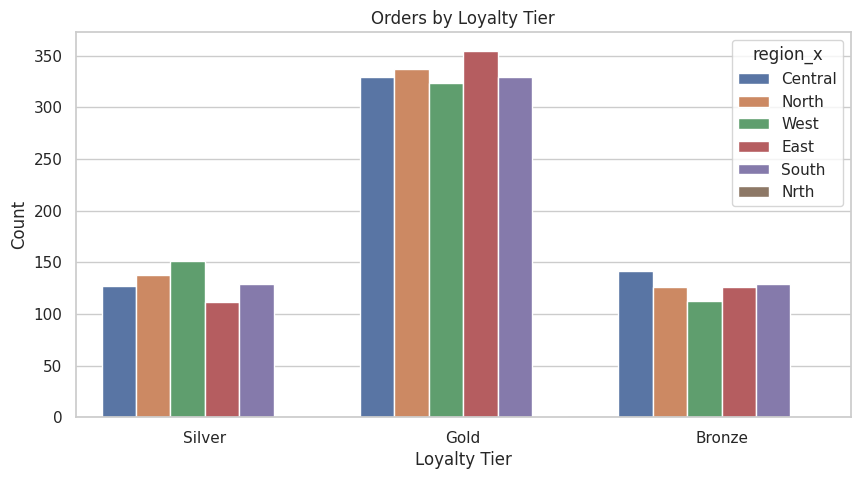

In [37]:
#Countplot - orders by loyalty tier (with hue = region)
plt.figure(figsize=(10,5))
sns.countplot(
    data=merged_df,
    x="loyalty_tier",
    hue="region_x"
)
plt.xlabel("Loyalty Tier")
plt.ylabel("Count")
plt.title("Orders by Loyalty Tier")
plt.show()


In [38]:
merged_df["delivery_status"]=merged_df["delivery_status"].replace({'Delrd':'Delayed', 'Delyd':'Delayed'})

merged_df["delivery_status"].unique()

array(['Delivered', 'Delayed', 'Cancelled', nan], dtype=object)

/tmp/ipython-input-3535382982.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["price_band", "delivery_status"])


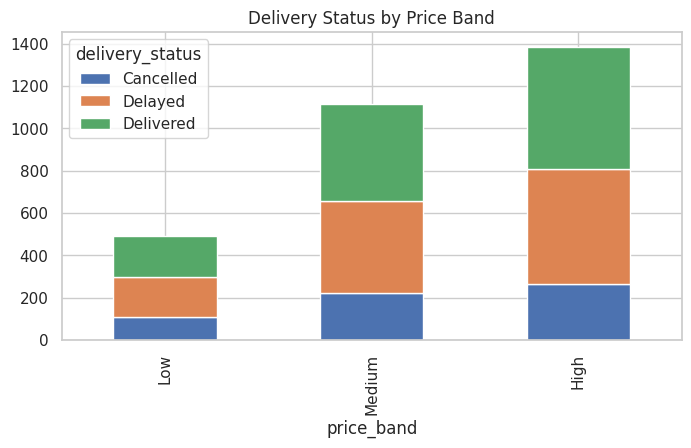

In [39]:
#Stacked bar Delivery Status by Price Band
delivery_status_band = (
    merged_df
    .groupby(["price_band", "delivery_status"])
    .size()
    .unstack()
)

delivery_status_band.plot(
    kind="bar",
    stacked=True,
    figsize=(8,4),
    title="Delivery Status by Price Band"
)
plt.show()
